### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and view the CSV file(s) as reviews
reviews = pd.read_csv('turtle_reviews.csv')

reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Sensecheck the data
reviews.shape

(2000, 11)

In [4]:
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [5]:
reviews.info

<bound method DataFrame.info of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     ed

Summary: 2000 rows of data, 11 columns, default index included, float, integer and object datatypes

## 1.1 Check for missing data

In [6]:
reviews.count()

gender                    2000
age                       2000
remuneration (k£)         2000
spending_score (1-100)    2000
loyalty_points            2000
education                 2000
language                  2000
platform                  2000
product                   2000
review                    2000
summary                   2000
dtype: int64

In [7]:
# Check for missing data
reviews_na = reviews[reviews.isna().any(axis=1)]

In [8]:
# View missing data
reviews_na

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary


Summary: There does not appear to be any missing data

## 1.2 Describe the data

In [9]:
# Descriptive statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 1.3 Visualise Loyalty Point distribution

<AxesSubplot:xlabel='gender', ylabel='loyalty_points'>

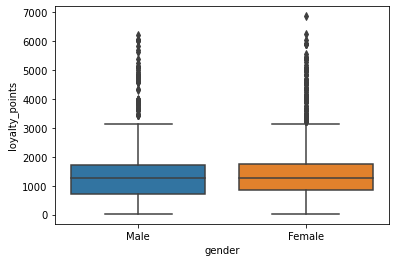

In [10]:
# Visualise the distribution of loyalty points
sns.boxplot(data=reviews, x='gender', y='loyalty_points')

In [11]:
loyalty = reviews[['loyalty_points']]

In [12]:
loyalty.head()

,loyalty_points
0,210
1,524
2,40
3,562
4,366


<AxesSubplot:xlabel='loyalty_points', ylabel='Count'>

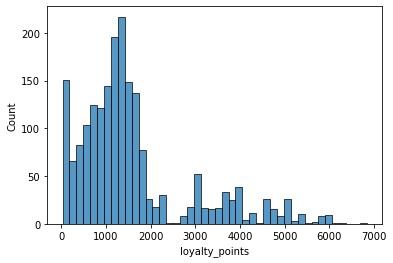

In [13]:
sns.histplot(data=loyalty, x='loyalty_points')

Summary: distribution of loyalty points appears left skewed. When viewed for male and female points, significant amounts of outliers can be observed.

## 2. Drop redundant columns

In [14]:
# Drop Language and Platform columns
reviews.drop('language', inplace=True, axis=1)

In [15]:
reviews.drop('platform', inplace=True, axis=1)

In [16]:
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [17]:
# Rename the remuneration (k£) column header
reviews.rename(columns = {'remuneration (k£)':'salary', 'spending_score (1-100)':'spendscore'}, inplace = True)

In [18]:
reviews.columns

Index(['gender', 'age', 'salary', 'spendscore', 'loyalty_points', 'education',
       'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [19]:
# Create a CSV file as output
reviews.to_csv('reviews_clean.csv', index=False)

In [20]:
# Import new CSV file with Pandas.
cust_reviews = pd.read_csv('reviews_clean.csv')

cust_reviews.head()

,gender,age,salary,spendscore,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5.1 Spending vs Loyalty

### 5.1.1 Define the variables

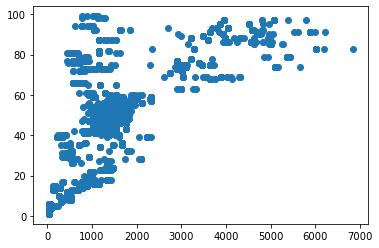

In [21]:
# Dependent variable
y = cust_reviews['spendscore'] 

# Independent variable
x = cust_reviews['loyalty_points']

# Check for linearity
plt.scatter(x,y)

### 5.1.2 Fit model and run OLS summary

In [22]:
f = 'y ~ x'
test = ols(f, data = cust_reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.92e-263
Time:                        15:11:50   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
x              0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.1.3 Extract estimated parameters, standard errors and predicted values

In [23]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    28.426033
x             0.013671
dtype: float64
Standard errors:  Intercept    0.684905
x            0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


### 5.1.4 Generate regresstion table: set x coefficient and constant

In [24]:
# x coef: 0.0137
# constant coef: 28.4260

y_pred = 0.0137 * x + 28.4260

y_pred

0        31.3030
1        35.6048
2        28.9740
3        36.1254
4        33.4402
          ...   
1995     83.6507
1996     35.8103
1997    105.3378
1998     42.7836
1999     34.9883
Name: loyalty_points, Length: 2000, dtype: float64

### 5.1.5 Plot graph with regression line

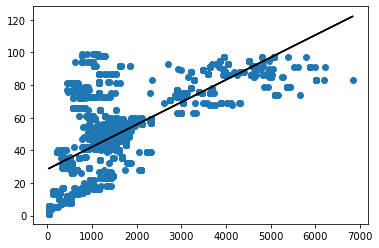

In [25]:
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')

### 5.2.1 Salary vs Loyalty

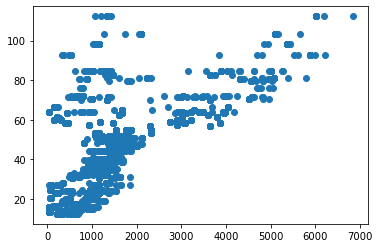

In [26]:
# Dependent variable
y = cust_reviews['salary'] 

# Independent variable
x = cust_reviews['loyalty_points']

# Check for linearity
plt.scatter(x,y)

### 5.2.2 Fit model and run OLS summary

In [27]:
f = 'y ~ x'
test = ols(f, data = cust_reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.43e-209
Time:                        15:12:04   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
x              0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.2.3 Extract estimated parameters, standard errors and predicted values

In [28]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    30.560555
x             0.011101
dtype: float64
Standard errors:  Intercept    0.645817
x            0.000318
dtype: float64
Predicted values:  [32.89186761 36.3777352  31.00461446 ... 92.88431491 42.19491551
 35.87816819]


### 5.2.4 Generate regresstion table: set x coefficient and constant

In [29]:
# x coef: 0.0111
# constant coef: 30.5606

y_pred = 0.0111 * x + 30.5606

y_pred

0       32.8916
1       36.3770
2       31.0046
3       36.7988
4       34.6232
         ...   
1995    75.3047
1996    36.5435
1997    92.8760
1998    42.1934
1999    35.8775
Name: loyalty_points, Length: 2000, dtype: float64

### 5.2.5 Plot graph with regression line

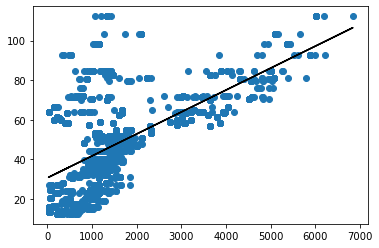

In [30]:
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')

### 5.3 Age vs Loyalty

### 5.3.1 Define the variables

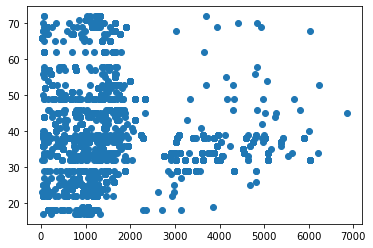

In [31]:
# Dependent variable
y = cust_reviews['age'] 

# Independent variable
x = cust_reviews['loyalty_points']

# Check for linearity
plt.scatter(x,y)

### 5.3.2 Fit model and run OLS summary

In [32]:
f = 'y ~ x'
test = ols(f, data = cust_reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 30 Jul 2022   Prob (F-statistic):             0.0577
Time:                        15:12:16   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2035      0.481     83.615      0.000      39.261      41.146
x             -0.0004      0.000     -1.899      0.058      -0.001    1.47e-05
==============================================================================
Omnibus:                       99.357   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                           0.574   Prob(JB):                     3.61e-25
Kurtosis:                       2.814   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.3.3 Extract estimated parameters, standard errors and predicted values

In [33]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    40.203457
x            -0.000449
dtype: float64
Standard errors:  Intercept    0.480816
x            0.000236
dtype: float64
Predicted values:  [40.10917768 39.96820745 40.18549915 ... 37.683053   39.73295776
 39.98841019]


### 5.3.4 Generate regresstion table: set x coefficient and constant

In [34]:
# x coef: -0.0004
# constant coef: 40.2035

y_pred = -0.0004 * x + 40.2035

y_pred

0       40.1195
1       39.9939
2       40.1875
3       39.9787
4       40.0571
         ...   
1995    38.5911
1996    39.9879
1997    37.9579
1998    39.7843
1999    40.0119
Name: loyalty_points, Length: 2000, dtype: float64

### 5.3.5 Plot graph with regression line

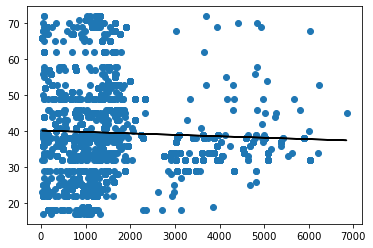

In [35]:
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')

## 6. Observations and insights

Differing probabilities with the loyalty points can be observed across the 3 comparisons of Age, Salary and Spend.

***Part 1: R Squared: probability that the dependant variable is influenced by loyalty points***

Age
- Age is not influenced / dependant on loyalty points
- R Squared is only 0.002 which means the percentage variation in dependent (Age) that is explained by independent (loyalty points) variable is only 2% 

Salary
- Salary show greater correlation with loyalty points
- R Squared is 0.380 which means 38% of Salary variable is dependant on loyalty points

Spend
- Spending shows the greatest correlation with loyalty points
- R Squared is 0.452 which means 45.2 of spend is dependant on loyalty points

***Part 2: Possible outliers***

The standard errors are:

Age: 0.481
Salary: 0.646
Spend: 0.685

The plots and standard errors suggest significant outliers exist.

***Part 3: P values***

P values are zero for salary and spend close to zero with a value of 0.058 for age.

***Part 4: Prob (F Statistic)***

Significant differences can be observed here between age when compared with salary and spend. The Age value is only 0.0577 compared to 2.43e and 2.92e for salary and spend respectively. This also indicates that the age variable is not influenced by the independant loyalty point variable.








# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [136]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [137]:
# Import new CSV file with Pandas.
df2 = pd.read_csv('reviews_clean.csv')

df2.head()

,gender,age,salary,spendscore,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [138]:
# View the DataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   salary          2000 non-null   float64
 3   spendscore      2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


### 2. Import a second version as df_gender

In [139]:
# Import new CSV file with Pandas.
df_gender = pd.read_csv('reviews_clean.csv')

df_gender.head()

,gender,age,salary,spendscore,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


### 3. Drop unnecessary columns from df2 (keep edu and gender)

In [140]:
# Drop unnecessary columns
df2 = df2.drop(columns=['age', 'loyalty_points', 'product', 'review', 'summary'])

# Display a summary of the numeric variables.
df2.describe()

,salary,spendscore
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


In [141]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      2000 non-null   object 
 1   salary      2000 non-null   float64
 2   spendscore  2000 non-null   int64  
 3   education   2000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 62.6+ KB


In [142]:
df2.head()

,gender,salary,spendscore,education
0,Male,12.30,39,graduate
1,Male,12.30,81,graduate
2,Female,13.12,6,graduate
3,Female,13.12,77,graduate
4,Female,13.94,40,graduate


### 4. Plot data using education as hue

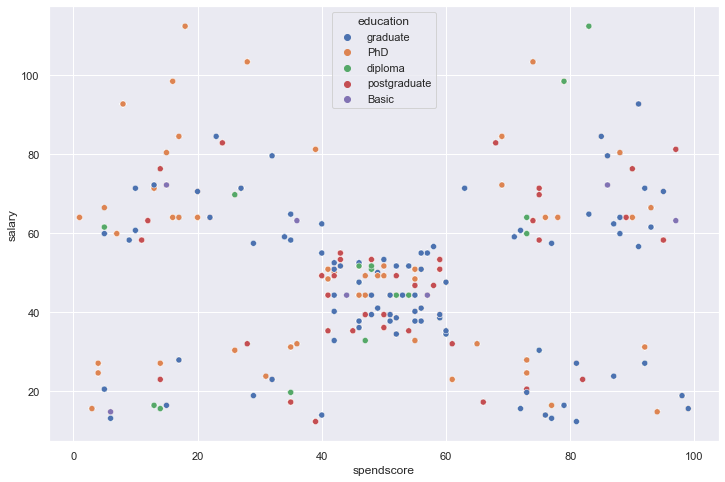

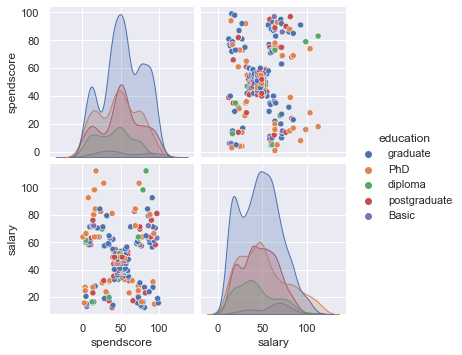

In [143]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='spendscore', y='salary',
                data=df2, hue='education')


# Create a pairplot with Seaborn.
x = df2[['spendscore', 'salary']]

sns.pairplot(df2, vars=x,
             hue='education', diag_kind= 'kde')

### 5. Create plots using df_gender and use gender as hue

In [173]:
# Drop unnecessary columns
df_gender = df_gender.drop(columns=['age', 'loyalty_points', 'product', 'review', 'summary'])

# Display a summary of the numeric variables.
df_gender.describe()

KeyError: "['age' 'loyalty_points' 'product' 'review' 'summary'] not found in axis"

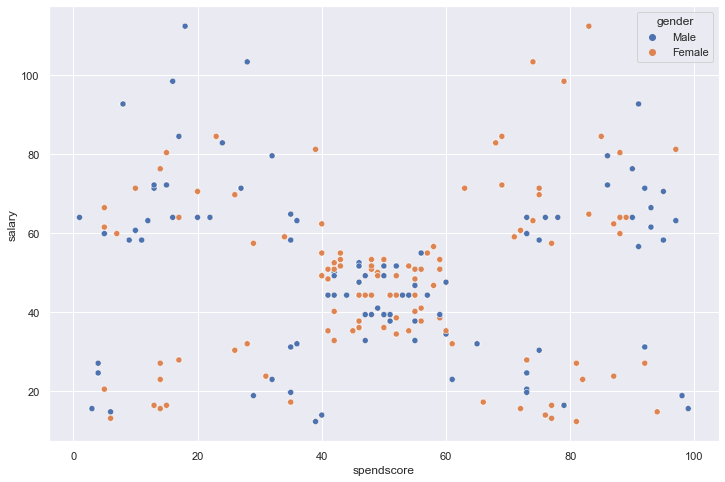

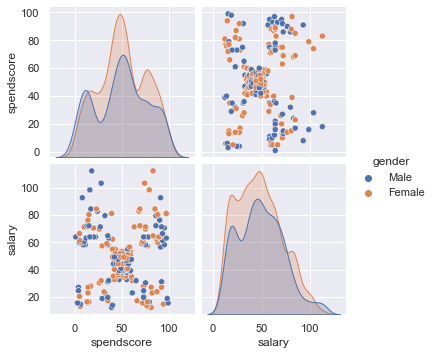

In [145]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='spendscore', y='salary',
                data=df_gender, hue='gender')


# Create a pairplot with Seaborn.
x1 = df2[['spendscore', 'salary']]

sns.pairplot(df_gender, vars=x1,
             hue='gender', diag_kind= 'kde')

- not a great difference is behaviour is observed between  male and female genders. Therefore progress analysis using education as hue.

## 6. Elbow and silhoutte methods

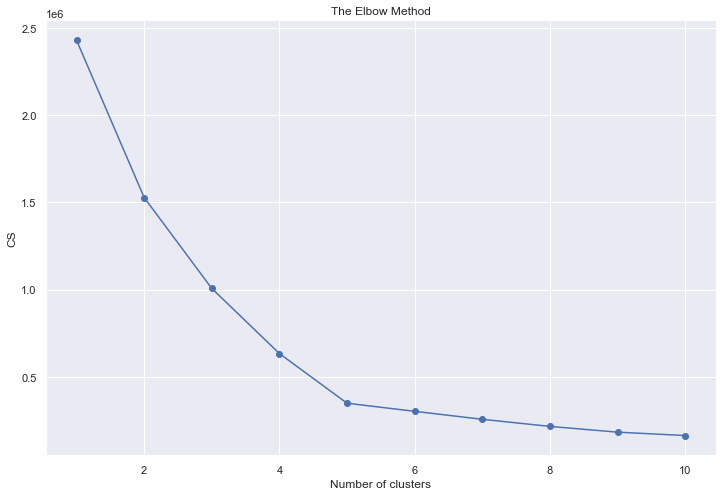

In [146]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

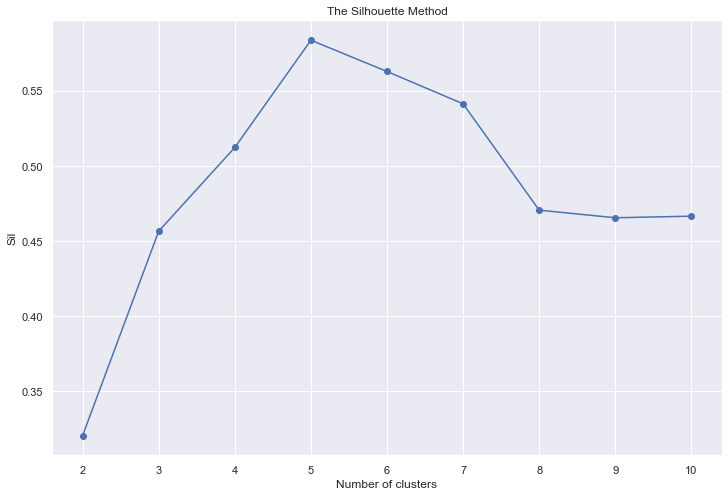

In [147]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 7. Evaluate k-means model with values of *k*

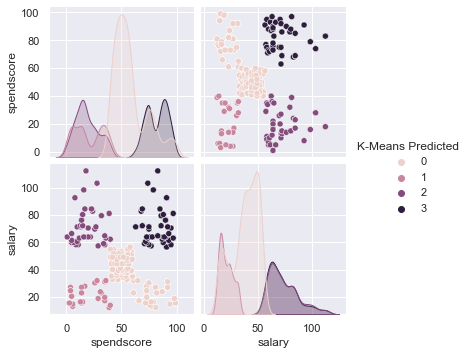

In [148]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [149]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [150]:
# View the K-Means predicted.
print(x.head())

   spendscore  salary  K-Means Predicted
0          39   12.30                  1
1          81   12.30                  0
2           6   13.12                  1
3          77   13.12                  0
4          40   13.94                  1


<AxesSubplot:xlabel='spendscore', ylabel='salary'>

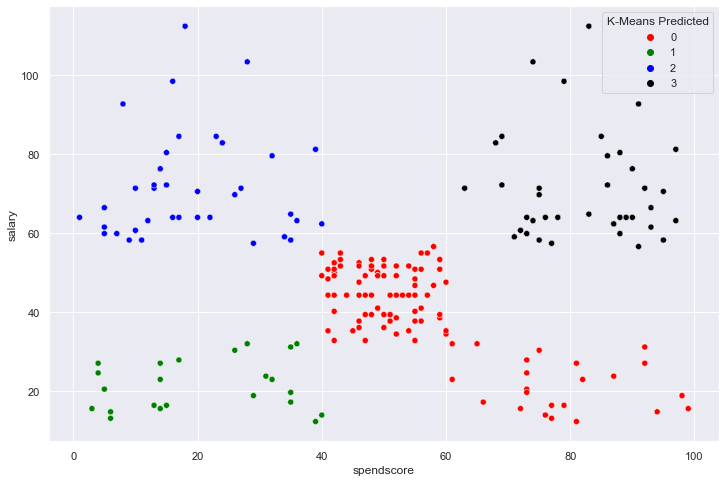

In [151]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spendscore' , 
                y ='salary',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

In [152]:
plt.savefig('4clusters.png')

<Figure size 864x576 with 0 Axes>

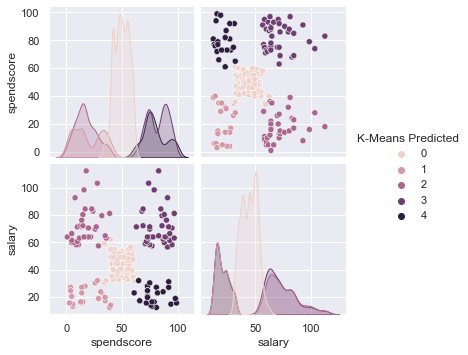

In [153]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [154]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [155]:
# View the K-Means predicted.
print(x.head())

   spendscore  salary  K-Means Predicted
0          39   12.30                  1
1          81   12.30                  4
2           6   13.12                  1
3          77   13.12                  4
4          40   13.94                  1


<AxesSubplot:xlabel='spendscore', ylabel='salary'>

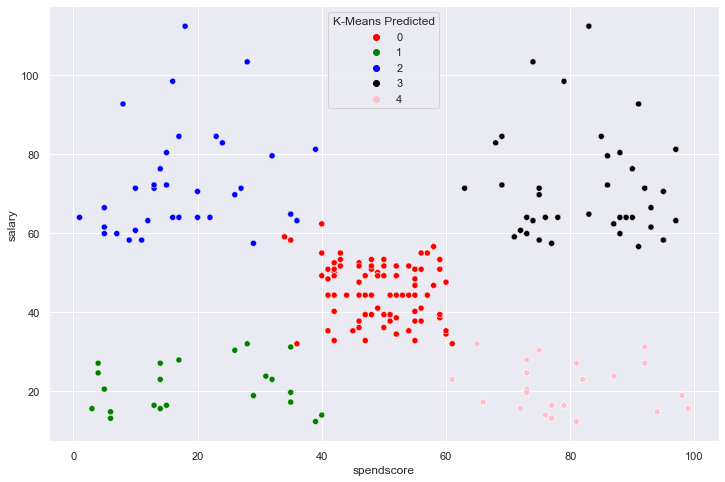

In [156]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spendscore' , 
                y ='salary',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'pink'])

In [157]:
plt.savefig('5clusters.png')

<Figure size 864x576 with 0 Axes>

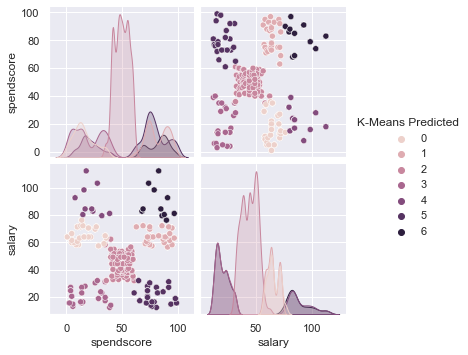

In [158]:
# Use 7 clusters:
kmeans = KMeans(n_clusters = 7, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [159]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    767
3    271
5    269
1    227
0    214
6    129
4    123
Name: K-Means Predicted, dtype: int64

In [160]:
# View the K-Means predicted.
print(x.head())

   spendscore  salary  K-Means Predicted
0          39   12.30                  3
1          81   12.30                  5
2           6   13.12                  3
3          77   13.12                  5
4          40   13.94                  3


<AxesSubplot:xlabel='spendscore', ylabel='salary'>

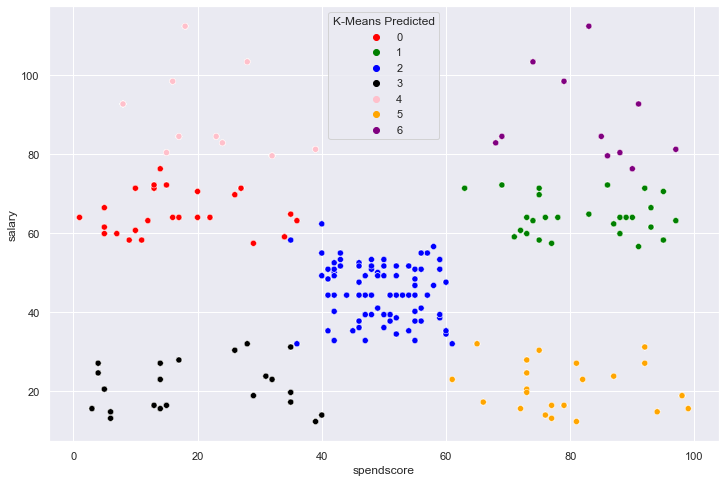

In [161]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spendscore' , 
                y ='salary',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'pink', 'orange', 'purple'])

In [162]:
plt.savefig('7clusters.png')

<Figure size 864x576 with 0 Axes>

## 8. Fit final model and justify your choice

Preferred K number is 5
- 5 represent ideal point in both Elbow and Silhouette methods.
- When testing 4 clusters the pairplot shows how to separate clusters are merged incorrectly - this is corrected when 5 clusters are used. The 5 cluster number appears to best fit the distribution of dots. 
- The value of 7 was also tested as on the Silhouette methods shows another point on the plot where a significant change is line plot can be observed. However when plotted, the additional 2 clusters appears to be drawn from exisiting clusters becase they appear more as outliers. However, they appear to better fit with the 5 clusters rather than represent new clusters in their own right.

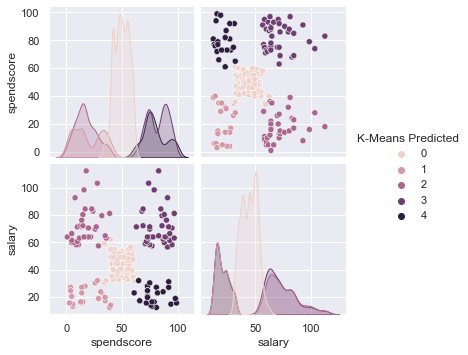

In [163]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [164]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [165]:
# View the K-Means predicted.
print(x.head())

   spendscore  salary  K-Means Predicted
0          39   12.30                  1
1          81   12.30                  4
2           6   13.12                  1
3          77   13.12                  4
4          40   13.94                  1


<AxesSubplot:xlabel='spendscore', ylabel='salary'>

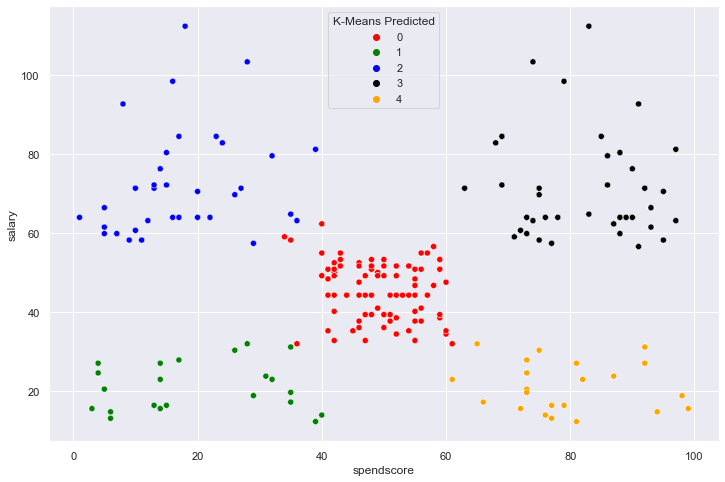

In [170]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spendscore' , 
                y ='salary',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

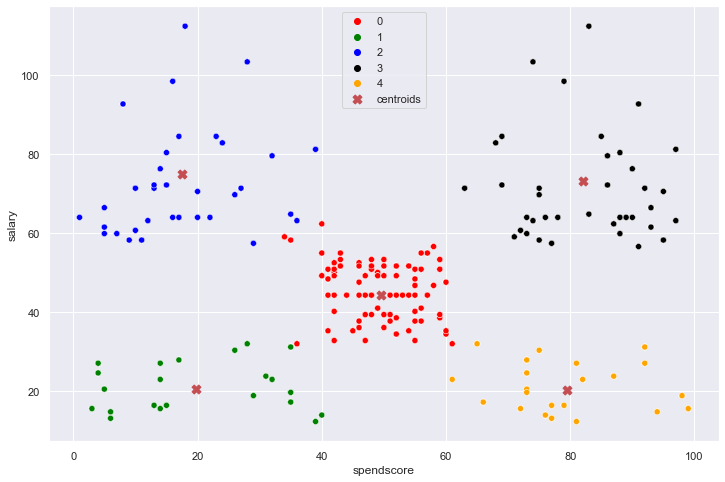

In [172]:
sns.scatterplot(x='spendscore' , 
                y ='salary',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## 9. Interpret the clusters, insights and oberservations

The 5 cluster plot shows that data points in the red cluster are most closely aligned with it's centroid. This suggests that we can be most confident in predicting that customers who earn between 35K and 55K will have a spendscore of between 40 and 60. We can also predict that this will form the largest customer group size (indicated by red cluster).

The second two most largest customer groups (blue and black clusters) demonstrate a broader spread from their cluster centroids. Although this data point spread is similiar, the cluster behaviours differ in termrs of spend score / salary relationships; the blue cluster has lower spend scores but highest salaries whereas the black cluster has highest spend scores and lightest salaries.

The remaining green and orange clusters both have lowest salaries. The green cluster also has a lower spend score but the orange cluster differs in that has higher spend scores. As with the blue and black clusters, the green and orange clusters are also more broadly spread from their centroids when compared to the red cluster.

In addition when exploring the data set, education appears to be an influencing factor when modelling the relationship of spend score and salary. Further exploration of this variable would arguably provide further information regarding customer spend and purchase behaviours.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set as df3.


# View DataFrame.


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.


In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [ ]:
# Replace all the puncuations in summary column.


# View output.


### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.


# View DataFrame.


## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).


# View DataFrame.


In [ ]:
# Apply tokenisation to both columns.


# View DataFrame.


In [ ]:
# Review: Create a word cloud.


In [ ]:
# Review: Plot the WordCloud image.


In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 